In [1]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv('data/main-processed.tsv', sep='\t')

In [3]:
df

,company,location,date,level_name,tag,yoe,yoe_total,tc,base,stock,bonus,title,work_arrangement,education,ethnicity,gender,other,track,country,state
0,Twitch,"San Francisco, CA",2022-05-04,L4,NaN,0.00000,0.00000,213360.00000,148000.00000,30000.00000,35000.00000,Software Engineer,Office,NaN,NaN,NaN,NaN,Software Engineer,United States,California
1,Atlassian,"Bangalore, KA, India",2022-05-04,P4,Distributed Systems (Back-End),2.00000,7.00000,86639.00000,53000.00000,29000.00000,5300.00000,Software Engineer,Remote,NaN,NaN,NaN,NaN,Software Engineer,India,Karnataka
2,Dell,"Bangalore, KA, India",2022-05-04,Software Engineer II,Embedded,3.00000,3.00000,21094.00000,19000.00000,919.00000,919.00000,Software Engineer 2,Hybrid,NaN,NaN,NaN,NaN,Software Engineer,India,Karnataka
3,Walmart Global Tech,"Sunnyvale, CA",2022-05-04,Senior Software Engineer,NaN,0.00000,2.00000,213875.00000,145000.00000,30000.00000,39000.00000,Senior Software Engineer,Office,Doctorate (PhD),NaN,NaN,I think they considered my PhD experience in t...,Software Engineer,United States,California
4,Carvana,"Atlanta, GA",2022-05-04,II,Web Development (Front-End),1.00000,4.00000,130000.00000,130000.00000,NaN,NaN,Software Engineer Ii,Remote,Bachelors degree,White,Female,NaN,Software Engineer,United States,Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65324,Blackhawk Network,"Pittsburgh, PA",2019-12-16,Staff,Full Stack,3.00000,15.00000,111000.00000,111000.00000,NaN,NaN,Software Engineer,Office,NaN,NaN,Female,NaN,Software Engineer,United States,Pennsylvania
65325,Apple,"Cupertino, CA",2019-12-16,ICT3,ML / AI,1.00000,1.00000,273000.00000,180000.00000,75000.00000,18000.00000,Software Engineer,Office,Doctorate (PhD),NaN,Male,PhD,Software Engineer,United States,California
65326,Google,"New York, NY",2019-12-16,L3,Full Stack,0.00000,0.00000,127000.00000,112000.00000,NaN,15000.00000,Software Engineer,Office,NaN,NaN,NaN,NaN,Software Engineer,United States,New York
65327,Rapid7,"Boston, MA",2019-12-16,Lead Software Engineer,Distributed Systems (Back-End),2.00000,11.00000,180000.00000,145000.00000,25000.00000,10000.00000,Software Engineer,Office,NaN,NaN,Male,NaN,Software Engineer,United States,Massachusetts


## Summary Stats

In [4]:
df[(df['country'] == 'United States') & (df['yoe_total'] == 0)]['tc'].describe()

count     5344.00000
mean    152734.03930
std      54718.74783
min       2500.00000
25%     110000.00000
50%     156000.00000
75%     182000.00000
max     600000.00000
Name: tc, dtype: float64

In [5]:
df[df['country'] == 'United States']['tc'].describe()

count     49950.00000
mean     218262.73692
std      123657.96670
min        1000.00000
25%      143000.00000
50%      190000.00000
75%      261000.00000
max     4490000.00000
Name: tc, dtype: float64

In [6]:
df['gender'].value_counts(dropna=False)

Male          37654
NaN           21751
Female         5605
Non-binary      318
Other             1
Name: gender, dtype: int64

In [7]:
1-(21751 / len(df))

0.667054447488864

In [8]:
df['ethnicity'].value_counts(dropna=False)

NaN                                          31126
Asian                                        18117
White                                        12011
Hispanic / Latino                             1804
Two or More Races                             1216
Black or African American                      905
American Indian or Alaska Native                95
Native Hawaiian or Other Pacific Islander       54
Hispanic                                         1
Name: ethnicity, dtype: int64

In [9]:
1-(31126 / len(df))

0.5235500313796323

In [10]:
df['gender'].replace("Other", np.nan, inplace=True)
df['gender'].value_counts(dropna=False)

Male          37654
NaN           21752
Female         5605
Non-binary      318
Name: gender, dtype: int64

In [11]:
df.groupby('gender')['tc'].mean()

gender
Female       178721.40821
Male         185515.05434
Non-binary   200221.61006
Name: tc, dtype: float64

In [12]:
df['location'].value_counts()[:10].index

Index(['Seattle, WA', 'San Francisco, CA', 'New York, NY', 'Mountain View, CA',
       'Bangalore, KA, India', 'Sunnyvale, CA', 'Redmond, WA', 'Austin, TX',
       'San Jose, CA', 'London, EN, United Kingdom'],
      dtype='object')

<AxesSubplot:xlabel='gender'>

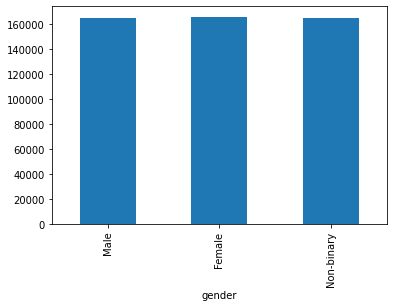

In [13]:
df.groupby('gender')['tc'].median().reindex(["Male", 'Female', 'Non-binary']).plot(kind='bar')

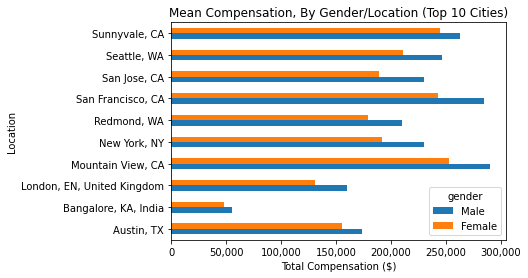

In [14]:
df[df['location'].isin(df['location'].value_counts()[:10].index)].groupby(['location', 'gender'])['tc'].mean().unstack()[['Male', 'Female']].plot(kind='barh')
plt.ylabel("Location")
plt.xlabel("Total Compensation ($)")
plt.title("Mean Compensation, By Gender/Location (Top 10 Cities)")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("./vis/dsc-167/barh.png", bbox_inches = "tight")

In [15]:
df['gender'].replace("Non-binary", np.nan, inplace=True)

In [16]:
df[df['country'] == 'United States'].groupby('gender')['tc'].mean()

gender
Female   195294.51343
Male     216718.57190
Name: tc, dtype: float64

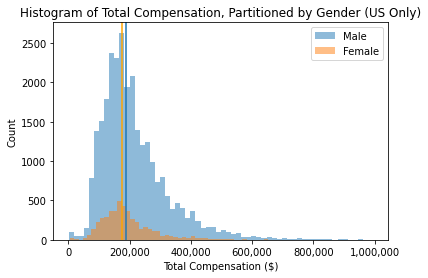

In [17]:
no_outliers = df[(df['tc'] < 1000000) & (df['country'] == 'United States')]
plt.hist(no_outliers[no_outliers['gender'] == 'Male']['tc'], bins=60, alpha = 0.5, label='Male')
plt.axvline(x=no_outliers[no_outliers['gender'] == 'Male']['tc'].median())
plt.hist(no_outliers[no_outliers['gender'] == 'Female']['tc'], bins=60, alpha = 0.5, label='Female')
plt.axvline(x=no_outliers[no_outliers['gender'] == 'Female']['tc'].median(), color='orange')
plt.title("Histogram of Total Compensation, Partitioned by Gender (US Only)")
plt.ylabel("Count")
plt.xlabel("Total Compensation ($)")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.savefig("./vis/dsc-167/hist.png")

In [18]:
no_outliers[no_outliers['gender'] == 'Male']['tc'].median() - no_outliers[no_outliers['gender'] == 'Female']['tc'].median()

13000.0

In [18]:
df = df[df['country'] == 'United States']

<AxesSubplot:xlabel='gender,yoe_total'>

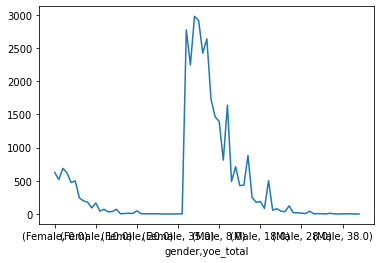

In [19]:
df.groupby(['gender', 'yoe_total'])['company'].count().plot()

<AxesSubplot:xlabel='yoe_total', ylabel='tc'>

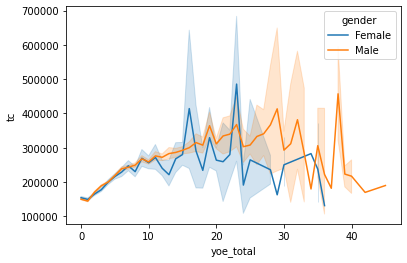

In [20]:
sns.lineplot(data=df, x='yoe_total', y='tc', hue='gender')

# Parity Measures

In [20]:
tot_m = 160.62 * 1000000 * 0.005
tot_f = 167.84 * 1000000 * 0.005

In [22]:
27678 / tot_m

0.03446395218528203

In [21]:
4690 / tot_f

0.0055886558627264065

In [34]:
df[df['country'] == 'United States']['gender'].value_counts()

Male      27678
Female     4690
Name: gender, dtype: int64

In [29]:
df[(df['yoe_total'] < 3) & (df['country'] == 'United States')]['gender'].value_counts()

Male      7996
Female    1835
Name: gender, dtype: int64

In [30]:
1835/7996

0.22948974487243623

In [23]:
m = 70322
f = 18316

In [25]:
f/m

0.2604590313131026

In [32]:
#Demo parity M
7996/70322

0.11370552600893034

In [33]:
#Demo parity F
1835/18316

0.1001856300502293

In [21]:
df2 = pd.read_excel('./data/bachelor_rates.xls')

# Interpretation - Education Levels